# Домашнее задание 1
## Бурмашев Григорий, Прокопова Полина, БПМИ-208

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig

In [2]:
sns.set(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('diamonds_1000.csv') 

In [4]:
numeric = ['carat', 'x', 'y', 'z']
df1 = df[numeric]

### Z-scoring

In [5]:
Xz = (df1 - df1.mean()) / df1.std()

z, mu, c = np.linalg.svd(Xz, full_matrices = False)
c = -c
z = -z 
z1 = np.sqrt(mu[0]) * z[:, 0]
z2 = np.sqrt(mu[1]) * z[:, 1]

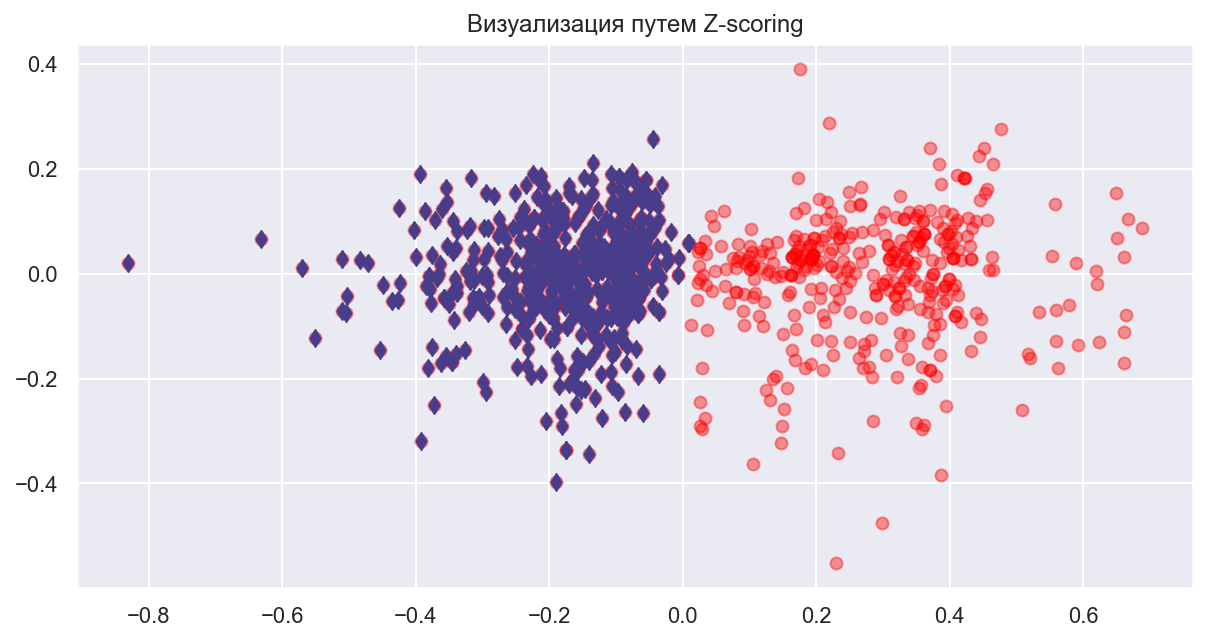

In [6]:
maskZ = Xz['carat'] > Xz['carat'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(z1, z2, alpha=0.4, color='red')
plt.scatter(z1[maskZ], z2[maskZ], alpha=1, color='darkslateblue', marker='d')
plt.title('Визуализация путем Z-scoring')
plt.show()

In [7]:
data_scatter = np.sum((Xz ** 2).values)
contributions = mu ** 2/ data_scatter
print(contributions)

[0.96116344 0.03348078 0.00356952 0.00178625]


### Нормирование с размахом

In [8]:
Xr = (df1 - df1.mean()) / (df1.max() - df1.min())

z_R, mu_R, c_R = np.linalg.svd(Xr, full_matrices = False)
c_R = -c_R
z_R = -z_R 
z_R1 = np.sqrt(mu_R[0]) * z_R[:, 0]
z_R2 = np.sqrt(mu_R[1]) * z_R[:, 1]

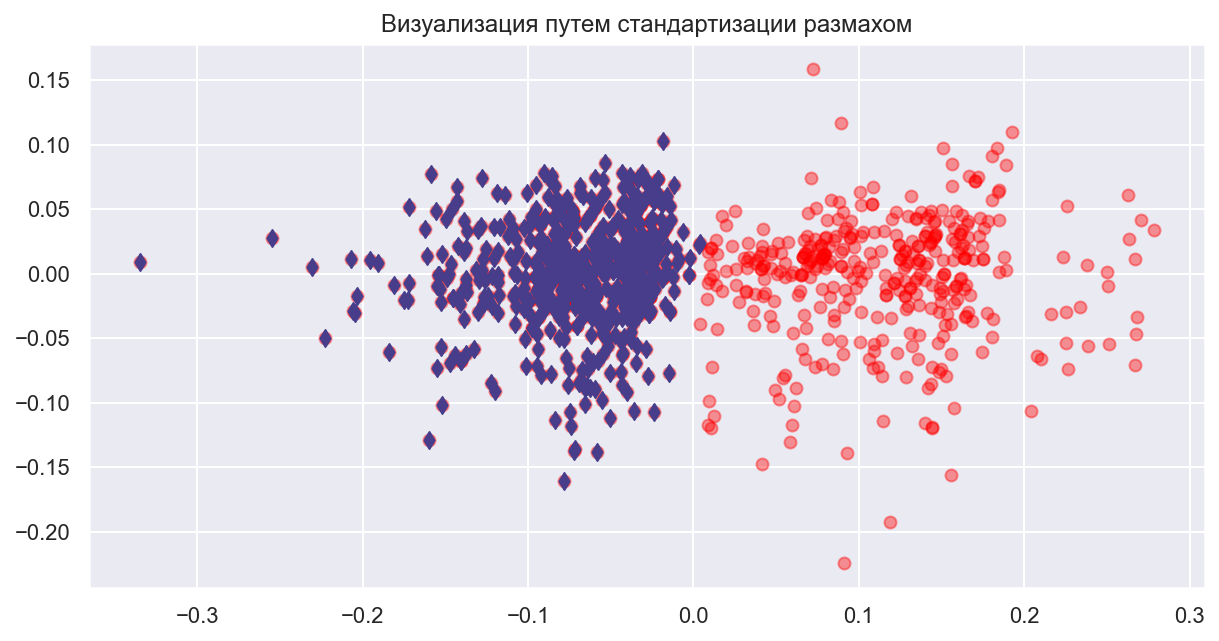

In [9]:
maskR = Xr['carat'] > Xr['carat'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(z_R1, z_R2, alpha=0.4, color='red')
plt.scatter(z_R1[maskR], z_R2[maskR], alpha=1, color='darkslateblue', marker='d')
plt.title('Визуализация путем стандартизации размахом')
plt.show()

### PCA 

In [10]:
print('Z score:')
print(c[0])
print(c[1])
print('Размах:')
print(c_R[0])
print(c_R[1])

Z score:
[-0.50689077 -0.50248906 -0.50201758 -0.48841052]
[ 0.12005369 -0.43350339 -0.44222628  0.77594964]
Размах:
[-0.4869066  -0.52693456 -0.49535127 -0.4897847 ]
[ 0.12238457 -0.44272167 -0.42212316  0.78155715]


#### Z score

In [11]:
cov = np.dot(Xz.T, Xz) / (Xz.shape[0]-1)
eig_val, eig_vec = eig(cov)

In [12]:
z1_ = np.dot(Xz, eig_vec[:, 0]) / np.sqrt(Xz.shape[0] * eig_val[0])
cov = cov - eig_val[0] * eig_vec[:, 0].reshape((4, 1)) * eig_vec[:, 0]
eig_val, eig_vec = eig(cov)
z2_ = np.dot(Xz, -eig_vec[:, 0]) / np.sqrt(Xz.shape[0] * eig_val[0])

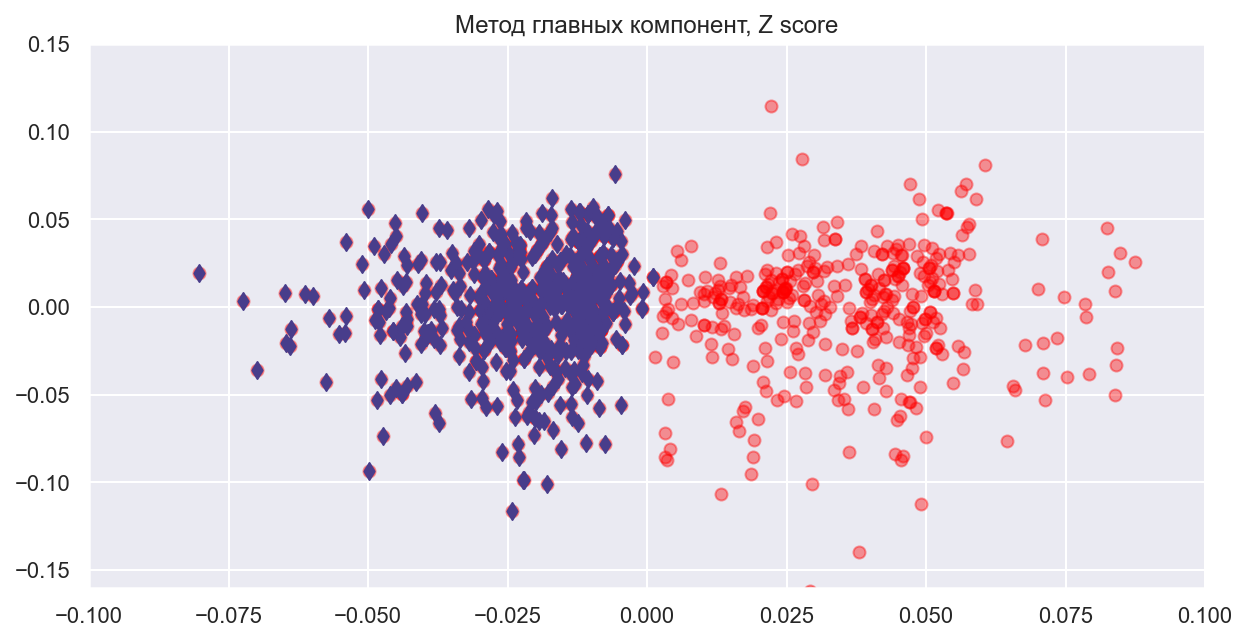

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Метод главных компонент, Z score')
plt.scatter(-z1_, -z2_, alpha=0.4, color='red')
plt.scatter(-z1_[maskZ], -z2_[maskZ], alpha=1, color='darkslateblue', marker='d')
plt.xlim(-0.10, 0.10)
plt.ylim(-0.16, 0.15)
plt.show()

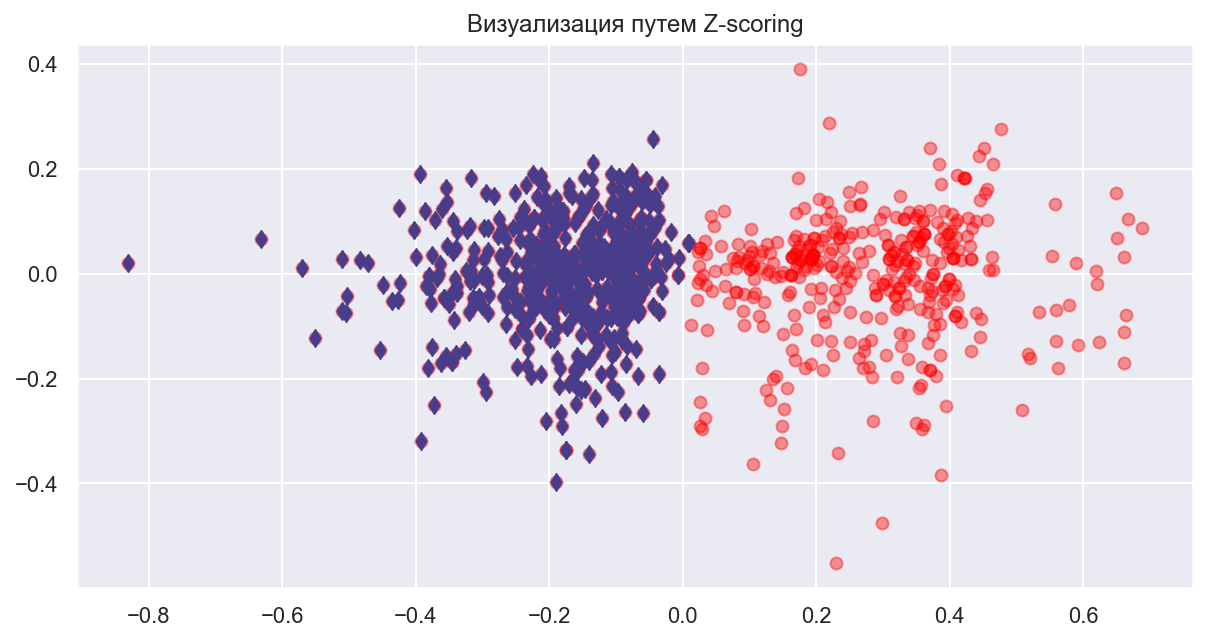

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Визуализация путем Z-scoring')
plt.scatter(z1, z2, alpha=0.4, color='red')
plt.scatter(z1[maskZ], z2[maskZ], alpha=1, color='darkslateblue', marker='d')
plt.show()

#### Размах

In [15]:
cov = np.dot(Xr.T, Xr) / (Xr.shape[0]-1)
eig_val, eig_vec = eig(cov)

In [16]:
z1_ = np.dot(Xr, eig_vec[:, 0]) / np.sqrt(Xr.shape[0] * eig_val[0])
cov = cov - eig_val[0] * eig_vec[:, 0].reshape((4, 1)) * eig_vec[:, 0]
eig_val, eig_vec = eig(cov)
z2_ = np.dot(Xr, -eig_vec[:, 0]) / np.sqrt(Xr.shape[0] * eig_val[0])

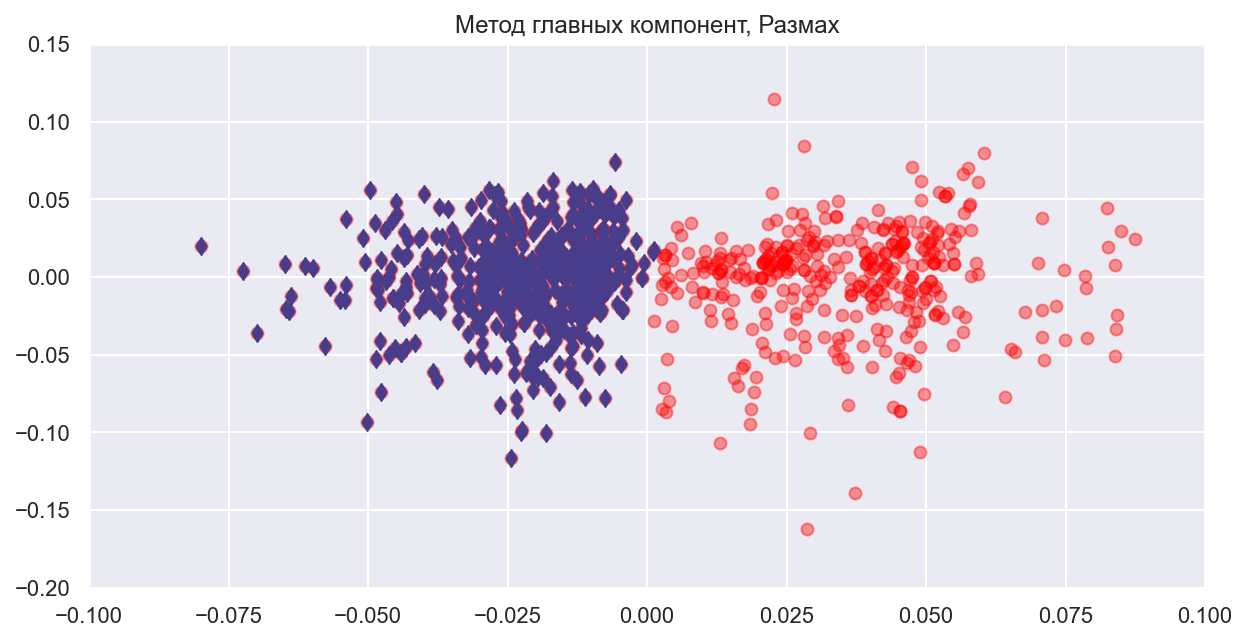

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Метод главных компонент, Размах')
plt.scatter(-z1_, -z2_, alpha=0.4, color='red')
plt.scatter(-z1_[maskR], -z2_[maskR], alpha=1, color='darkslateblue', marker='d')
plt.xlim(-0.10, 0.10)
plt.ylim(-0.20, 0.15)
plt.show()

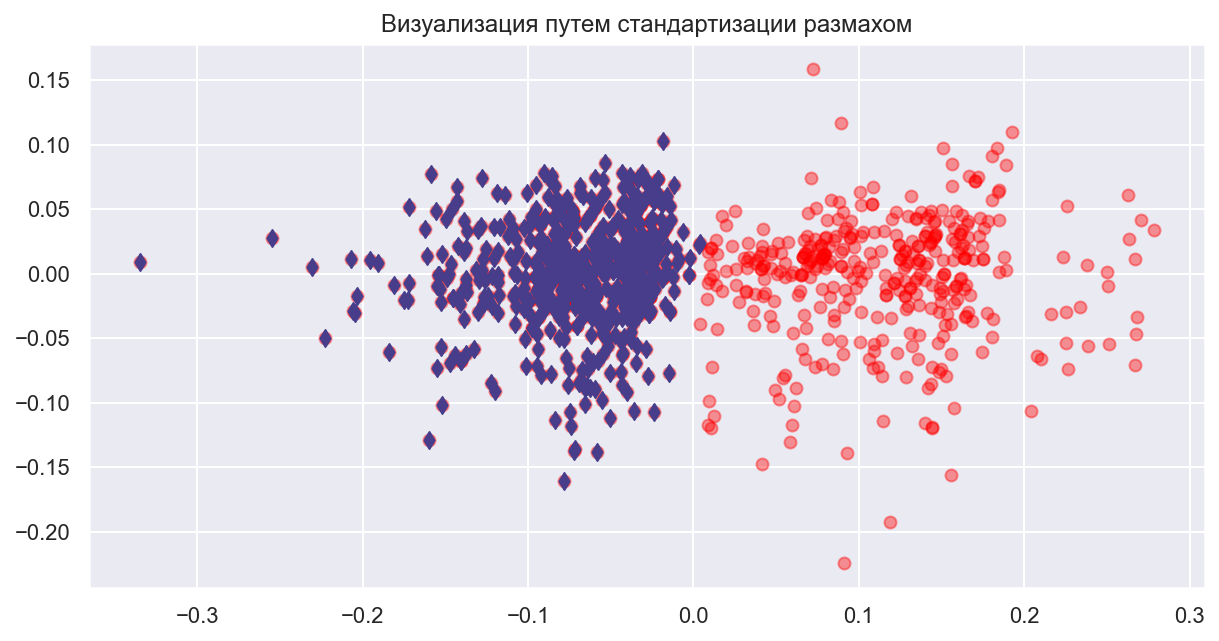

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Визуализация путем стандартизации размахом') 
plt.scatter(z_R1, z_R2, alpha=0.4, color='red')
plt.scatter(z_R1[maskR], z_R2[maskR], alpha=1, color='darkslateblue', marker='d')
plt.show()